<a href="https://colab.research.google.com/github/kalmuroth/lb-cml/blob/main/lb_cml_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementing Polynomial Regression with dummy data

In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate AIC
n = len(y)
k = len(model.coef_) + 1  # Adding 1 for the intercept
mse = np.mean((model.predict(X) - y)**2)
log_likelihood = -n/2 * np.log(2 * np.pi * mse) - n/2
aic = 2*k - 2*log_likelihood
print(f"AIC for Linear Regression: {aic}")

AIC for Linear Regression: -187.22032096665276


In [193]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Calculate AIC for polynomial regression
k_poly = len(model_poly.coef_)
mse_poly = np.mean((model_poly.predict(X_poly) - y)**2)
log_likelihood_poly = -n/2 * np.log(2 * np.pi * mse_poly) - n/2
aic_poly = 2*k_poly - 2*log_likelihood_poly
print(f"AIC for Polynomial Regression: {aic_poly}")

AIC for Polynomial Regression: -170.7252986405648


In [194]:
#load the libraries and titanic data (libraries already loaded)
#you can find it here :  https://www.kaggle.com/c/titanic/data
train = pd.read_csv("./drive/MyDrive/notebook/train.csv", sep=",")
gender = pd.read_csv('./drive/MyDrive/notebook/gender_submission.csv', sep=",")
test = pd.read_csv('./drive/MyDrive/notebook/test.csv', sep=",")
print("Data loaded.")

Data loaded.


In [195]:
#print the dataset shape
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [196]:
#print the dataset shape
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


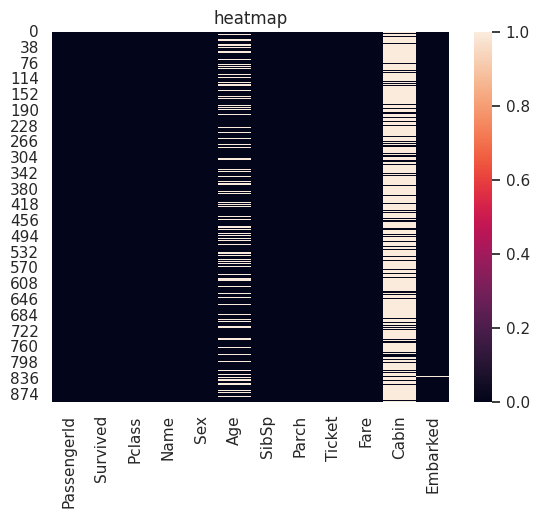

In [197]:
#plot the NaN values with a heatmap
sns.heatmap(train.isnull())
plt.title('heatmap')
plt.show()

In [198]:
#print the age % of NaN values
rows = len(train)
total = train['Age'].isnull().sum()
missing_percentage = str(round((total / rows) * 100,2))

print("Il y a " + missing_percentage +"% d'age qui manquent ")

Il y a 19.87% d'age qui manquent 


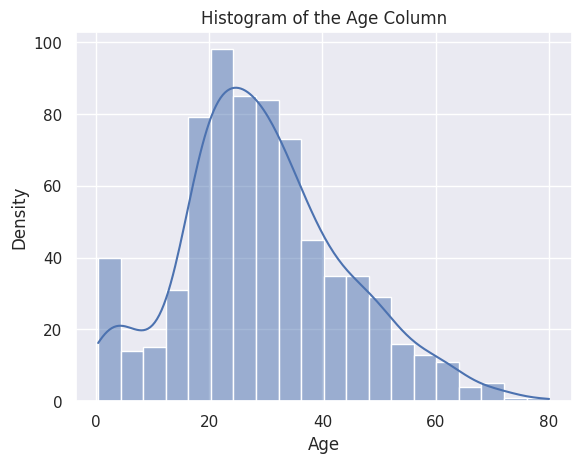

In [199]:
#print the histogram of the age column
plt.figure()
ax = sns.histplot(train['Age'].dropna(), kde=True)
plt.xticks([0, 20, 40, 60, 80], ['0', '20', '40', '60', '80'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of the Age Column')
plt.show()

In [200]:
#print the median and the mean of the age column
age_median = train['Age'].median()
age_mean = round(train['Age'].mean(), 2)
print("moyenne : " , age_mean)
print("medianne : " , age_median)

moyenne :  29.7
medianne :  28.0


In [201]:
#print the cabin % of NaN values
rows = len(train)
total = train['Cabin'].isnull().sum()
missing_percentage = str(round((total / rows) * 100,2))

print("Il y a " + missing_percentage +"% de Cabin qui manquent")

Il y a 77.1% de Cabin qui manquent


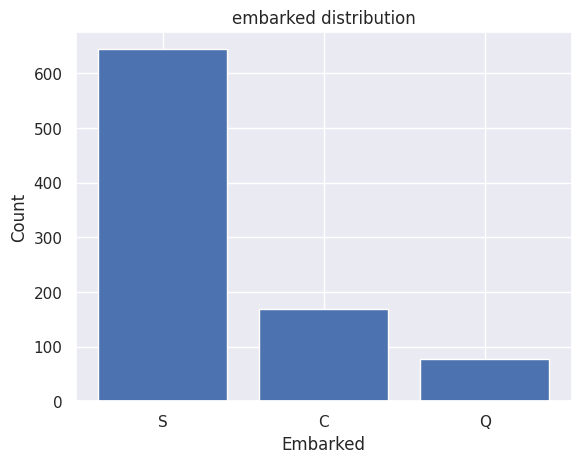

In [202]:
#print the embarked distribution
embarkation  = train['Embarked'].value_counts()
plt.bar(embarkation .index, embarkation .values)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('embarked distribution')
plt.show()


In [203]:
#apply the preprocessing like above
age_preprocessing = train['Age'].median()
train['Age'].fillna(age_preprocessing, inplace=True)

embarked_preprocessing  = train['Embarked'].mode()[0]
train['Embarked'].fillna(embarked_preprocessing, inplace=True)

original_train = pd.read_csv("./drive/MyDrive/notebook/train.csv", sep=",")


In [204]:
#verify your results
columns_to_exclude = ['Cabin']
columns_with_missing_values = train.columns.difference(columns_to_exclude)
missing_value_counts = train[columns_with_missing_values].isnull().sum()
print(missing_value_counts)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64


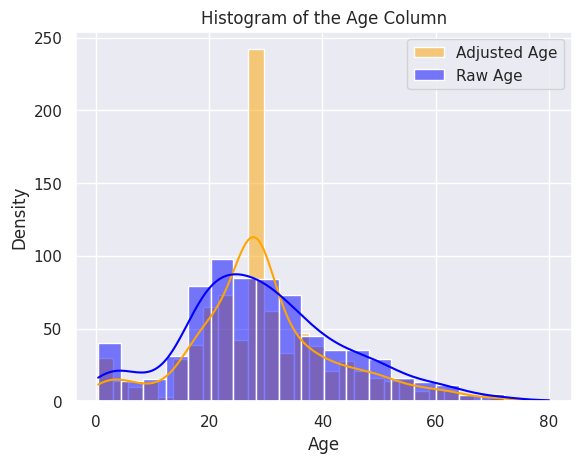

In [205]:
#print the histogram of the age column after and before processing
plt.figure()
sns.set(style='darkgrid')
sns.histplot(train['Age'].dropna(), kde=True, color='orange', label='Adjusted Age')
sns.histplot(original_train['Age'].dropna(), kde=True, color='blue', label='Raw Age')
plt.xticks([0, 20, 40, 60, 80], ['0', '20', '40', '60', '80'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of the Age Column')
plt.legend()
plt.show()

In [206]:
#create the feature 'TravelAlone'
from tabulate import tabulate
original_train['travelAlone'] = original_train.apply(lambda row: int(row['SibSp'] + row['Parch'] == 0), axis=1)
print(tabulate(original_train.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+--------+-----------------------------------------------------+--------+------+-------+-------+------------------+---------+-------+----------+-------------+
|   | PassengerId | Survived | Pclass |                        Name                         |  Sex   | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | Embarked | travelAlone |
+---+-------------+----------+--------+-----------------------------------------------------+--------+------+-------+-------+------------------+---------+-------+----------+-------------+
| 0 |      1      |    0     |   3    |               Braund, Mr. Owen Harris               |  male  | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |    S     |      0      |
| 1 |      2      |    1     |   1    | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38.0 |   1   |   0   |     PC 17599     | 71.2833 |  C85  |    C     |      0      |
| 2 |      3      |    1     |   3    |               Heikki

In [207]:
#use the get_dummies function to encode every needed features
data = pd.get_dummies(original_train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+
|   | PassengerId | Survived |                        Name                         | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_female | Sex_male |
+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+
| 0 |      1      |    0     |               Braund, Mr. Owen Harris               | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |      0      |    0     |    0     |    1     |     0      |     0      |     1      |     

In [208]:
#drop the columns that you don't need
remove_column = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Sex_female'])
print(tabulate(remove_column, headers='keys', tablefmt='pretty'))

+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|     | Survived | Age  | SibSp | Parch |   Fare   |      Cabin      | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_male |
+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|  0  |    0     | 22.0 |   1   |   0   |   7.25   |       nan       |      0      |    0     |    0     |    1     |     0      |     0      |     1      |    1     |
|  1  |    1     | 38.0 |   1   |   0   | 71.2833  |       C85       |      0      |    1     |    0     |    0     |     1      |     0      |     0      |    0     |
|  2  |    1     | 26.0 |   0   |   0   |  7.925   |       nan       |      1      |    0     |    0     |    1     |     0      |     0      |     1      |    

In [209]:
#print the null value of this dataset
columns_to_exclude = ['Cabin']
columns_with_missing_values = train.columns.difference(columns_to_exclude)
missing_value_counts = train[columns_with_missing_values].isnull().sum()
print(missing_value_counts)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64


In [210]:
#do the same thing for the test dataset
train['Age'].fillna(train['Age'].median(), inplace=True)
most_common_embarked_train = train['Embarked'].value_counts().idxmax()
train['Embarked'].fillna(most_common_embarked_train, inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['travelAlone'] = train.apply(lambda row: int(row['SibSp'] + row['Parch'] == 0), axis=1)
data_test = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
remove_column_test = data_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Sex_female'])
print(tabulate(remove_column, headers='keys', tablefmt='pretty'))

+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|     | Survived | Age  | SibSp | Parch |   Fare   |      Cabin      | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_male |
+-----+----------+------+-------+-------+----------+-----------------+-------------+----------+----------+----------+------------+------------+------------+----------+
|  0  |    0     | 22.0 |   1   |   0   |   7.25   |       nan       |      0      |    0     |    0     |    1     |     0      |     0      |     1      |    1     |
|  1  |    1     | 38.0 |   1   |   0   | 71.2833  |       C85       |      0      |    1     |    0     |    0     |     1      |     0      |     0      |    0     |
|  2  |    1     | 26.0 |   0   |   0   |  7.925   |       nan       |      1      |    0     |    0     |    1     |     0      |     0      |     1      |    

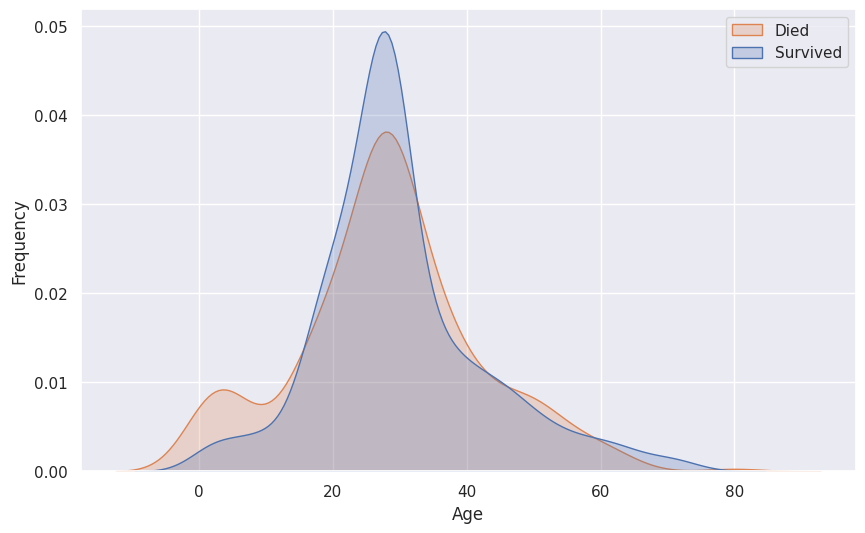

In [211]:
#print the age feature distribution and highlight the survived feature
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=remove_column_test, x='Age', hue='Survived', fill=True, common_norm=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(labels=["Died", "Survived"])
plt.savefig("age_feature_distributio.png")

In [212]:
#add the "IsMinor" variable to your data (a person is considered a minor if they are under 16)
data = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
data['IsMinor'] = (data['Age'] < 16).astype(int)
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+---------+
|   | PassengerId | Survived |                        Name                         | Age  | SibSp | Parch |      Ticket      |  Fare   | Cabin | travelAlone | Pclass_1 | Pclass_2 | Pclass_3 | Embarked_C | Embarked_Q | Embarked_S | Sex_female | Sex_male | IsMinor |
+---+-------------+----------+-----------------------------------------------------+------+-------+-------+------------------+---------+-------+-------------+----------+----------+----------+------------+------------+------------+------------+----------+---------+
| 0 |      1      |    0     |               Braund, Mr. Owen Harris               | 22.0 |   1   |   0   |    A/5 21171     |  7.25   |  nan  |      0      |    0     |    0     |    1     |     0      | 

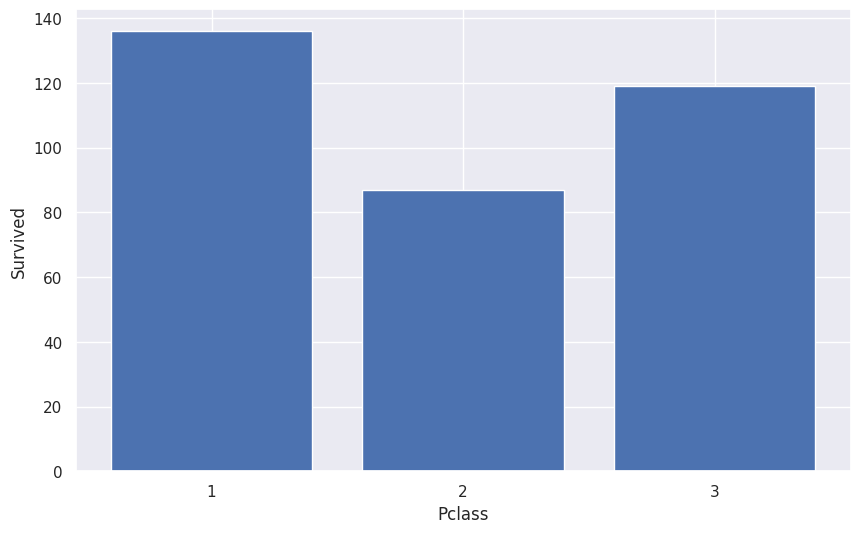

In [213]:
#show survivors by class
survivors_by_class = [data[data[f'Pclass_{i}'] == 1]['Survived'].sum() for i in range(1, 4)]
column = ['1', '2', '3']
plt.figure(figsize=(10, 6))
plt.bar(column, survivors_by_class)
plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()

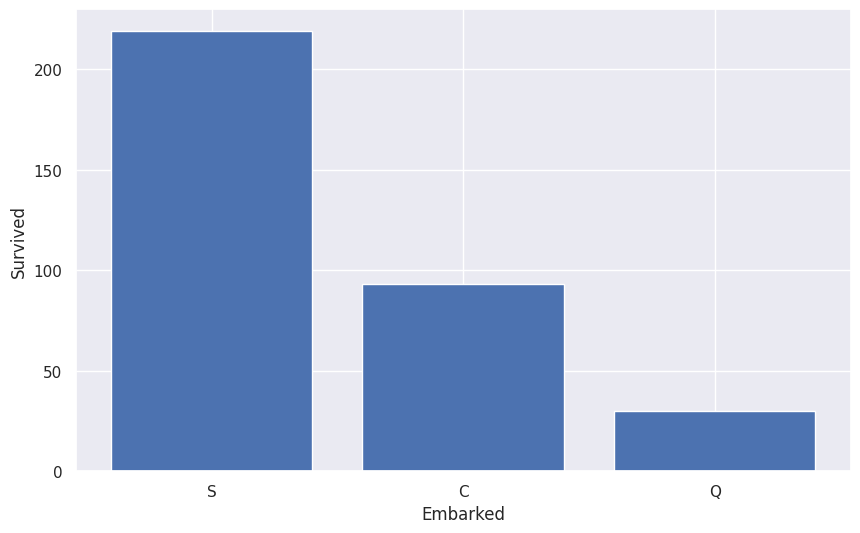

In [214]:
#do the same for embarked feature
survivors_by_embarked = [data[data[f'Embarked_{port}'] == 1]['Survived'].sum() for port in ['S', 'C', 'Q']]
ports = ['S', 'C', 'Q']
plt.figure(figsize=(10, 6))
plt.bar(ports, survivors_by_embarked)
plt.xlabel('Embarked')
plt.ylabel('Survived')

plt.show()

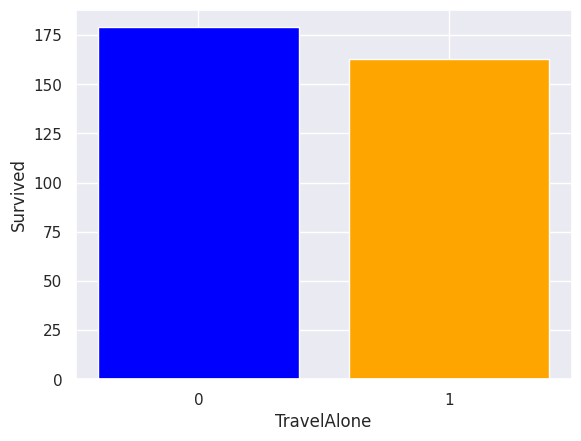

In [215]:
#do the same for the Traveling Alone feature we've created earlier
survivors_by_class = data[['travelAlone', 'Survived']].groupby(['travelAlone']).sum().reset_index()

plt.bar(survivors_by_class.index, survivors_by_class['Survived'], color=['blue', 'orange'])
plt.xlabel('TravelAlone')
plt.ylabel('Survived')
plt.xticks(survivors_by_class.index, ['0', '1'])
plt.show()

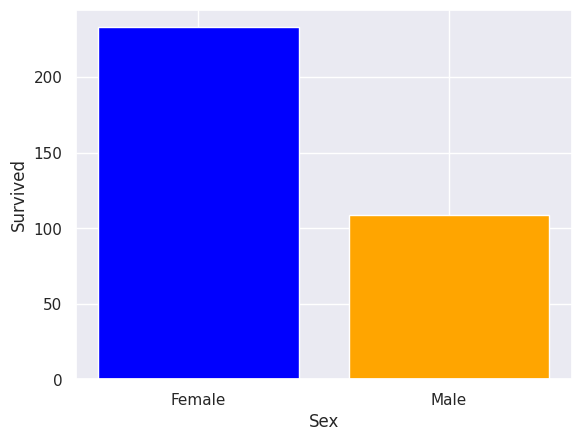

In [216]:
#gender distribution of survivors
survivors_by_sex = data[['Sex_male', 'Survived']].groupby(['Sex_male']).sum().reset_index()

plt.bar(survivors_by_sex['Sex_male'], survivors_by_sex['Survived'], color=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks(survivors_by_sex['Sex_male'], ['Female', 'Male'])
plt.show()

In [217]:
#define x and y for the model
array = ['Age','travelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor',]
X = data[array]
Y = data['Survived']

In [218]:
#instanciate a LogisticRegression estimator in sklearn
logisticRegression = LogisticRegression()

In [219]:
#create a RFE model and select 4 atribute
rfe = RFE(logisticRegression, n_features_to_select=4)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor'], dtype='object')


In [220]:
#create a RFE model and select 8 atribute
rfe = RFE(logisticRegression, n_features_to_select=8)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Age', 'travelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


In [221]:
#instantiate an RFECV object (with a scoring='accuracy') and do as stated above
rfe = RFECV(logisticRegression, scoring='accuracy')
rfe.fit(X,Y)

print("Optimal number of features: ", rfe.n_features_)
print("Selected features: ", X.columns[rfe.support_])

Optimal number of features:  8
Selected features:  Index(['Age', 'travelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


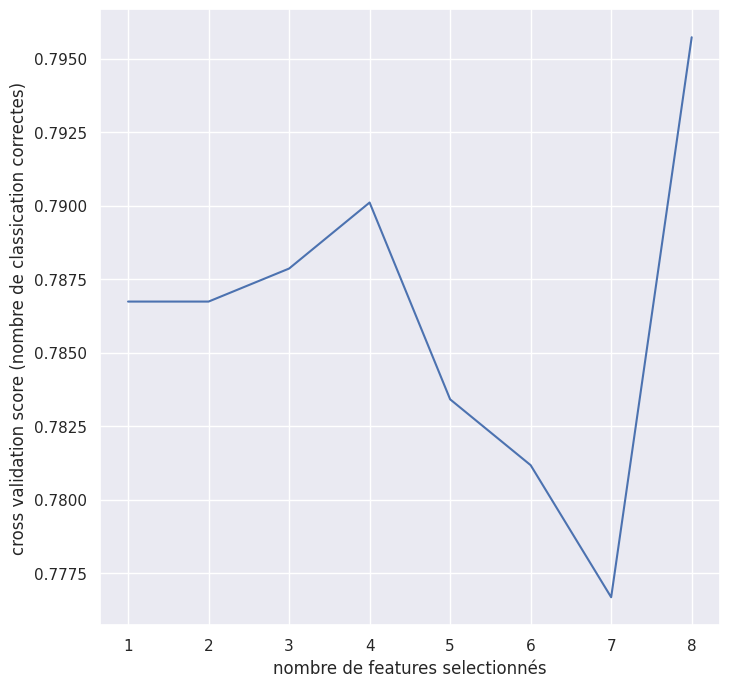

In [222]:
#plot features numbers VS. cross-validation scores
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

plt.xlabel("nombre de features selectionnés")
plt.ylabel("cross validation score (nombre de classication correctes)")
plt.plot(range(1, len(rfe.cv_results_['mean_test_score']) + 1), rfe.cv_results_['mean_test_score'])
plt.savefig("age_feature_distributio.png")

In [223]:
#create the new dataframe and print the shape
selected_feature_indices = rfe.support_
selected_X = X.iloc[:, selected_feature_indices]

new_model = LogisticRegression()
new_model.fit(selected_X, Y)

print("Shape of selected_X:", selected_X.shape)
print("Shape of coefficient array:", new_model.coef_[0].shape)

Shape of selected_X: (891, 8)
Shape of coefficient array: (8,)


In [224]:
#split your data with an alpha=20% and a random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [225]:
#make a prediction on the test set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = logistic_model.predict(X_test)

# Predict probabilities on the testing data
y_pred_prob = logistic_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the log loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)

# Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("AUC:", auc)

Accuracy: 0.8044692737430168
Log Loss: 0.43226163193213346
AUC: 0.8732947232947234


In [226]:
#make a prediction with the predict_proba function and display
# the accuracy of the model
# the cross-entropy loss
# the air below the ROC curve (AUC)
# say what these metrics do ?
y_pred_prob = logistic_model.predict_proba(X_test)

# Calculate and print the accuracy score
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # Accuracy represents the proportion of correct predictions.

# Calculate and print the log loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss) # Log Loss measures the performance of a classification model where the predicted output is a probability value between 0 and 1.

# Calculate and print the AUC score
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("AUC:", auc) # AUC (Area Under the ROC Curve) measures the model's ability to distinguish between the positive and negative classes, considering different threshold values.

Accuracy: 0.8044692737430168
Log Loss: 0.43226163193213346
AUC: 0.8732947232947234


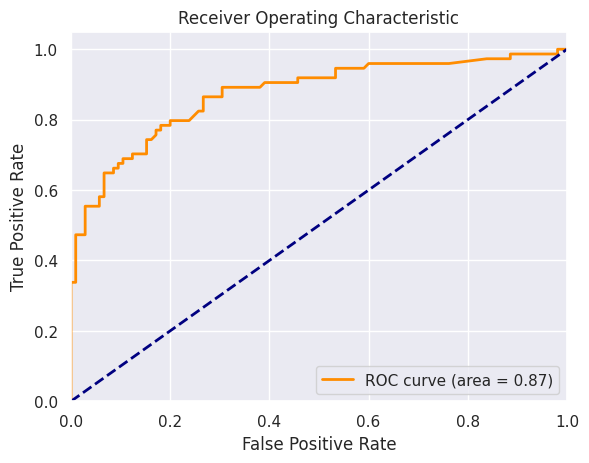

In [227]:
#display roc curve
#what do you notice ?
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()